# Polarization in NH - 2020 Presidential Election

In the recent US presidential election, Biden won 51.3% and Trump won 46.9% of the popular vote.  However, what struck me when I looked at maps of the towns in my state of New Hampshire, was how in so many of the towns, the race wasn't close at all.  There are towns in New Hampshire that voted for Trump over 2:1, and there are towns that voted for Biden over 2:1.  Since the area around me is mostly rural, I got to thinking, what is different about these towns?   

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import ranksums

In [2]:
results = pd.read_csv('results.csv')

In [5]:
results.set_index('Town', inplace=True)

In [6]:
results.head()

,County,Trump,Biden,Other,Perc_Trump,Perc_Biden,Winner,wr_Biden,wr_Trump,population,Total Acres,Total Sq Miles,Land Acres,Land Sq Miles,Water Acres,Water Sq Miles,Income,zip_code,pop_density
Town,,,,,,,,,,,,,,,,,,,
Acworth,Sullivan,269.0,293.0,7.0,0.478648,0.521352,Biden,1.089219,NaN,895.0,"24,998.94",39.06,"24,916.99",38.93,81.95,0.13,57125.0,3601.0,22.989982
Albany,Carroll,190.0,250.0,9.0,0.431818,0.568182,Biden,1.315789,NaN,751.0,"48,475.55",75.74,"48,252.97",75.40,222.58,0.35,58750.0,3818.0,9.960212
Alexandria,Grafton,616.0,440.0,24.0,0.583333,0.416667,Trump,NaN,1.400000,1618.0,"27,921.21",43.63,"27,867.68",43.54,53.53,0.08,58750.0,3222.0,37.161231
Allenstown,Merrimack,1233.0,1050.0,42.0,0.540079,0.459921,Trump,NaN,1.174286,4447.0,"13,167.43",20.57,"13,097.95",20.47,69.48,0.11,54769.0,3275.0,217.244748
Alstead,Cheshire,477.0,684.0,28.0,0.410853,0.589147,Biden,1.433962,NaN,1938.0,"25,210.86",39.39,"24,943.55",38.97,267.31,0.42,57097.0,3602.0,49.730562


### Visualization

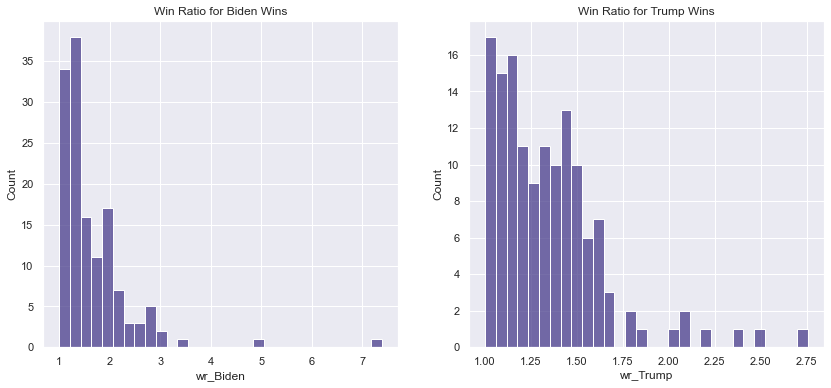

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
_ = plt.subplot(1,2,1)
_ = sns.histplot(data = results, x = 'wr_Biden', bins=30, color='darkslateblue')
_ = plt.title('Win Ratio for Biden Wins')
_ = plt.subplot(1,2,2)
_ = sns.histplot(data = results, x = 'wr_Trump', bins=30, color='darkslateblue')
_ = plt.title('Win Ratio for Trump Wins')


In [8]:
NH_win_ratio = results['Biden'].sum()/ results['Trump'].sum()
NH_win_ratio

1.3076530605073742

So now we can see that while overall, the election in the state was very close, with a win ratio of 1.16, there are many towns where the win ratio for Biden or Trump was much much higher.  Why are some towns skewed in favor of Trump and others in favor of Biden, even within my own county, which is mostly rural?  

In [9]:
results[results['County']=='Hillsborough']

,County,Trump,Biden,Other,Perc_Trump,Perc_Biden,Winner,wr_Biden,wr_Trump,population,Total Acres,Total Sq Miles,Land Acres,Land Sq Miles,Water Acres,Water Sq Miles,Income,zip_code,pop_density
Town,,,,,,,,,,,,,,,,,,,
Amherst,Hillsborough,3208.0,4796.0,133.0,0.400800,0.599200,Biden,1.495012,NaN,11393.0,"22,025.34",34.41,"21,718.34",33.93,307,0.48,127246.0,3031.0,335.779546
Antrim,Hillsborough,779.0,761.0,35.0,0.505844,0.494156,Trump,NaN,1.023653,2690.0,"23,367.58",36.51,"22,833.25",35.68,534.33,0.83,64886.0,3440.0,75.392377
Bedford,Hillsborough,7052.0,7521.0,166.0,0.483909,0.516091,Biden,1.066506,NaN,22628.0,"21,156.06",33.06,"20,963.39",32.76,192.67,0.30,127945.0,3110.0,690.720391
Bennington,Hillsborough,424.0,395.0,14.0,0.517705,0.482295,Trump,NaN,1.073418,1516.0,"7,412.45",11.58,"7,266.68",11.35,145.77,0.23,60278.0,3442.0,133.568282
Brookline,Hillsborough,1647.0,1903.0,78.0,0.463944,0.536056,Biden,1.155434,NaN,5453.0,"12,924.40",20.19,"12,745.81",19.92,178.59,0.28,127222.0,3033.0,273.744980
Deering,Hillsborough,670.0,462.0,26.0,0.591873,0.408127,Trump,NaN,1.450216,1973.0,"19,987.89",31.23,"19,571.19",30.58,416.7,0.65,65650.0,3244.0,64.519294
Francestown,Hillsborough,534.0,592.0,26.0,0.474245,0.525755,Biden,1.108614,NaN,1583.0,"19,442.05",30.38,"19,102.58",29.85,339.47,0.53,92333.0,3043.0,53.031826
Goffstown,Hillsborough,5040.0,4967.0,183.0,0.503647,0.496353,Trump,NaN,1.014697,18053.0,"24,064.53",37.60,"23,771.75",37.14,292.78,0.46,81842.0,3045.0,486.079698
Greenfield,Hillsborough,466.0,529.0,15.0,0.468342,0.531658,Biden,1.135193,NaN,1847.0,"17,303.38",27.04,"16,950.94",26.49,352.44,0.55,71429.0,3047.0,69.724424


For instance, in my county alone, we see towns with a win ratio of almost 2.5 in favor of Biden, but we also see towns that are over 2 to 1 in favor of Trump.  Let's look at some other data.

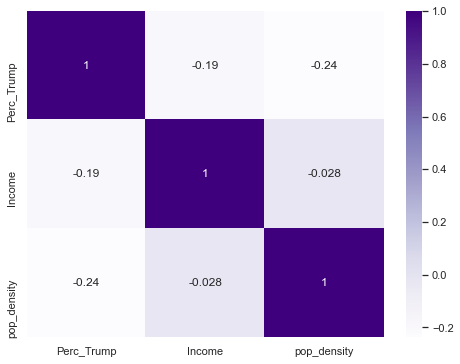

In [10]:
# Correlation Heatmap
plt.subplots(figsize=(8,6))
sns.heatmap(results[['Perc_Trump','Income','pop_density']].corr(), \
            annot=True, cmap='Purples')

Wow, there is very little correlation between population density or income and the percentage of Trump voters.  This is not at all what I was expecting because we hear in the news all the time that Trump supporters tend to be less wealthy and from more rural areas.  Let's look at that data more closely.  

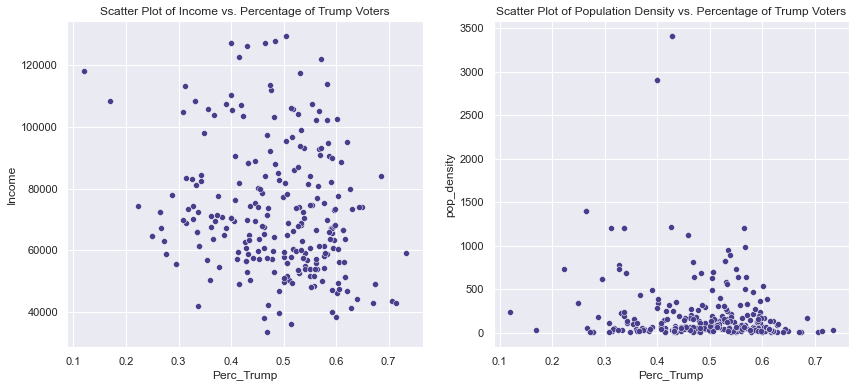

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
_ = plt.subplot(1,2,1)
_ = sns.scatterplot(x='Perc_Trump',y='Income',data=results, ci=95, color='darkslateblue')
_ = plt.title('Scatter Plot of Income vs. Percentage of Trump Voters')
_ = plt.subplot(1,2,2)
_ = sns.scatterplot(x='Perc_Trump',y='pop_density',data=results, ci=95, color='darkslateblue')
_ = plt.title('Scatter Plot of Population Density vs. Percentage of Trump Voters')

This is so interesting.  So our data does indeed look like it has very little correlation.

However New Hampshire does have some densely populated areas, so would we see any correlation if we looked at only rural areas?  

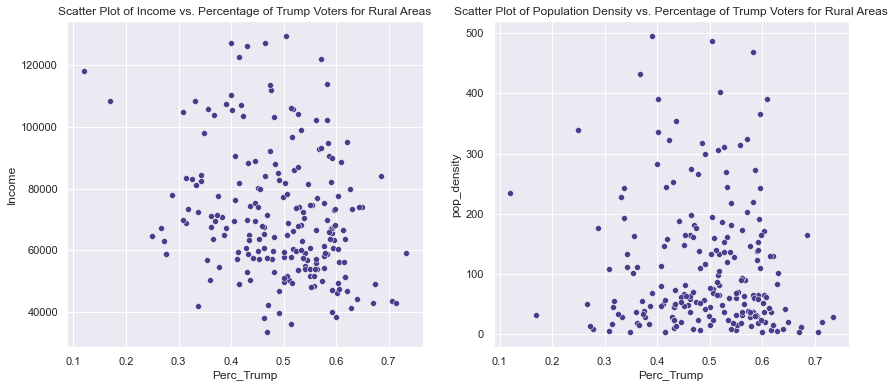

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
_ = plt.subplot(1,2,1)
_ = sns.scatterplot(x='Perc_Trump',y='Income',data=results[results['pop_density']<500], ci=95, color='darkslateblue')
_ = plt.title('Scatter Plot of Income vs. Percentage of Trump Voters for Rural Areas')
_ = plt.subplot(1,2,2)
_ = sns.scatterplot(x='Perc_Trump',y='pop_density',data=results[results['pop_density']<500], ci=95, color='darkslateblue')
_ = plt.title('Scatter Plot of Population Density vs. Percentage of Trump Voters for Rural Areas')

We still see remarkably little correlation. 

The story I seem to have found so far is that there is no story, which is in itself interesting.  Perhaps looking at this data geographically might make things more clear.  To that end, I created some visualizations in Tableau.  

[Tableau Visualizations](https://public.tableau.com/profile/ruth.caswell.smith#!/?newProfile=&activeTab=0)

You can see from these visualizations that there are some geographic clusters in terms of the voting, and there are some geographic clusters in terms of both income and population density, and yet those clusters do not match up geograpically.  In the broadest sense, both income and population density are higher in the southern and southeastern portion of the state, and yet in those areas the voting results are mixed.  

More questions to be solved.  If only we had more data by zip code.  My personal hypothesis is that towns have a culture, and the voting results correlated with culture.  Now, how to measure culture is an interesting problem.  Number of miles to a bookstore?  Gun registrations?  Electric vehicle registrations?  Questions for another time!  